### Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.datasets import boston_housing
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import History 
from keras import initializers
from keras import optimizers

## Load Data and Quick Check

In [3]:
#Load Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#Check
train.head(10)


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
5,11,0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
6,12,0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
7,13,0.09378,12.5,7.87,0,0.524,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
8,14,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26,20.4
9,15,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2


In [4]:
#Check Evaluation Data
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [5]:
#Check Shapes train/test
print(train.shape)
print(test.shape)

(333, 15)
(173, 14)


### Data Check, Preprocessing, Creating Validation Data

In [6]:
#Remove ID Variable
train.drop("ID", axis=1, inplace= True,errors= "ignore")

x_test =  test.drop("ID", axis=1,errors= "ignore")
y_train = train["medv"]
x_train = train.drop("medv", axis=1, errors= "ignore")


In [7]:
# Pandas to numpy array
x_test = x_test.as_matrix()
x_train = x_train.as_matrix()
y_train = y_train.as_matrix()

#Splitting Data into Train/Valid
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.33, random_state=39)


In [8]:
# Check Shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)

(223, 13)
(223,)
(110, 13)
(110,)
(173, 13)


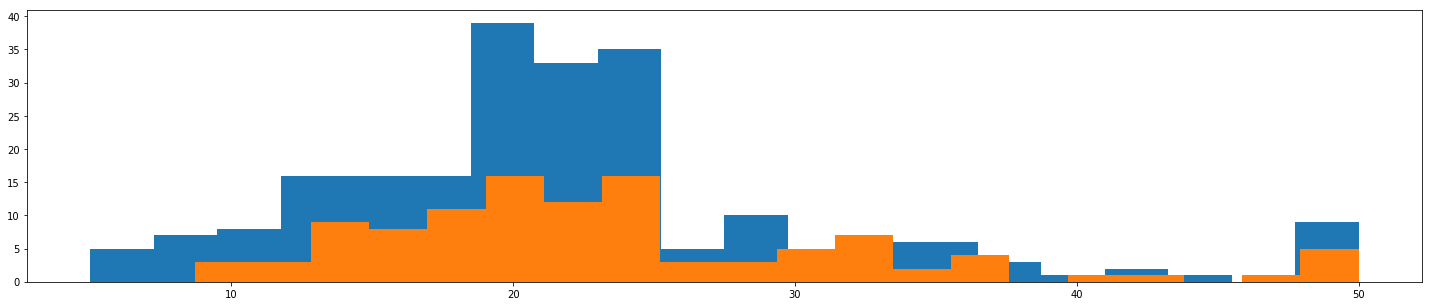

In [9]:
#Check Train/Valid datasets distributions
%matplotlib inline
x = np.arange(0, len(y_train),1)
plt.figure(figsize=(25, 5))
plt.hist(y_train,20)
plt.hist(y_valid,20)
plt.show()



## UDFs ##

In [10]:
#Define RMSE for loss 
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
    
    
# Get final Loss
def loss_eval(x_train, y_train, x_val, y_val, batch_size): 
    score_train = model.evaluate(x_train, y_train, batch_size=batch_size)
    score_valid  = model.evaluate(x_val, y_val, batch_size= batch_size)
    return score_train, score_valid


# Get Loss Timeline
def loss_epoch(history, y_lim_min, y_lim_max):
    hist = list(history.history.values())
    x = np.arange(0, len(hist[0]),1)
    plt.figure(figsize=(20, 5))
    plt.plot(x, hist[0], x, hist[1])
    plt.ylim([y_lim_min,y_lim_max])
    plt.show()

# Submit to CSV for desired kaggle Format

def to_kaggle_csv(origin_csv, x_predictions, filename):
    submit = origin_csv
    y_pred = model.predict(x_predictions)
    submit = submit.assign(medv = y_pred )
    test
    submit2 = submit[["ID", "medv"]]
    print(submit2.head())
    submit2.to_csv("submit.csv", sep=',', index= False)
    


## Optimizers to choose

In [11]:
sgd = optimizers.SGD(lr=0.0001, momentum=0.1, decay=0.0, nesterov=False, clipvalue=0.5)

#It is recommended to leave the parameters of this optimizer at their default values 
# (except the learning rate, which can be freely tuned).
rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

#It is recommended to leave the parameters of this optimizer at their default values.
adagrad = optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)

#Default parameters follow those provided in the original paper.
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

k_tnorm = initializers.TruncatedNormal(mean=0.0, stddev=0.2, seed=None)
k_runif = initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=None)

### Build Model and Compile

In [44]:
model = Sequential()
model.add(Dense(35, input_dim =(13),kernel_initializer= k_tnorm))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(8, kernel_initializer = k_tnorm))
model.add(Dense(1, kernel_initializer = k_tnorm))

#model.add(Dropout(0.1))
#model.add(Activation("relu"))

#Test Model weights
#model = Sequential()
#model.add(Dense(3, input_dim =(13),kernel_initializer= k_tnorm))
#model.add(Dense(1, input_dim =(13),kernel_initializer= k_tnorm))

model.compile(optimizer=adam ,loss=root_mean_squared_error)

### Train Model

In [45]:
history = History()
fit = model.fit(x_train, y_train,
                batch_size=16,
                epochs=5000,
                verbose=0, callbacks=[history],
                validation_data =(x_valid, y_valid), shuffle = True
               )

## Evaluation of Train/Val Loss

110/110 [==============================] - 0sA: 0s
1.83651137459 2.63981103897


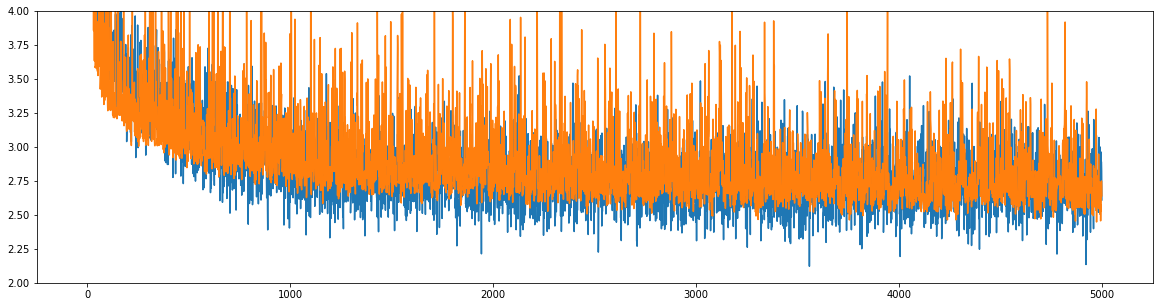

In [48]:
score_train, score_valid = loss_eval(x_train, y_train, x_valid, y_valid, 128)
print(score_train, score_valid)
loss_epoch(history,2,4)



## Check Fitting Errors , Visual

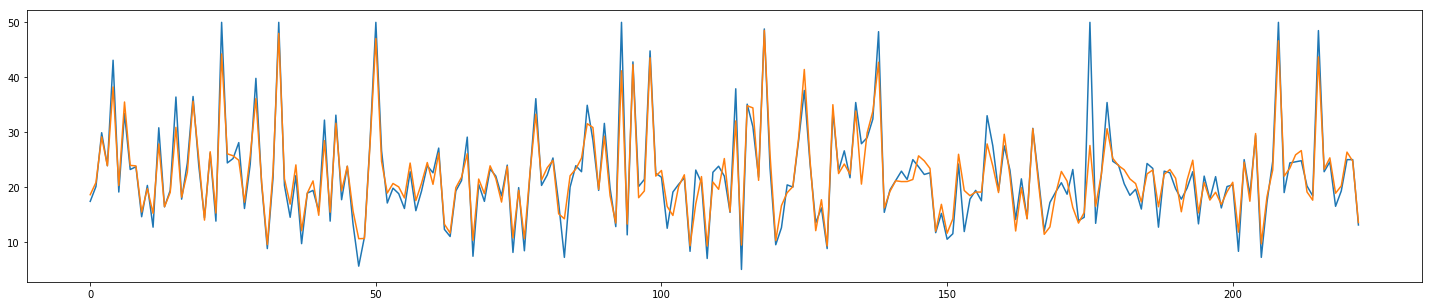

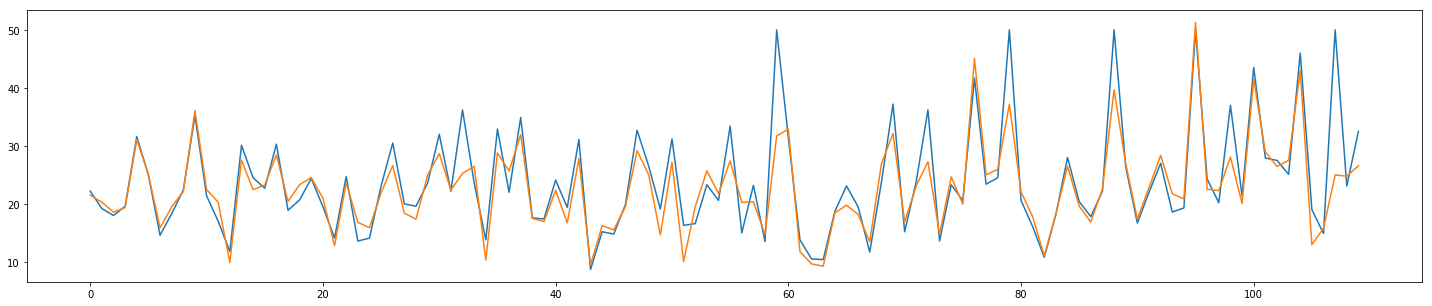

In [49]:
# It's not a Timeline, but you can see difference between y and yhat
# Fittness Train Data
x = np.arange(0, len(y_train),1)
y_pred = model.predict(x_train)
plt.figure(figsize=(25, 5))
plt.plot(x, y_train, x , y_pred)


# Fittness Valid Data
x = np.arange(0, len(y_valid),1)
y_pred = model.predict(x_valid)
plt.figure(figsize=(25, 5))
plt.plot(x, y_valid, x , y_pred)

In [50]:
to_kaggle_csv(test, x_test, "submit.csv" )

   ID       medv
0   3  29.622190
1   6  22.685175
2   8  19.431620
3   9  19.390053
4  10  19.484415


## Extras

In [38]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(weights)

[array([[ -1.25426322e-01,  -3.18364668e+00,   9.99242812e-02,
          1.51226580e-01,  -6.69227004e-01,   5.68315424e-02,
         -2.86376327e-01,   3.10936123e-01,   4.66255620e-02,
         -2.58548141e-01,  -1.21232951e+00,  -3.96979713e+00,
         -1.01574969e+00,   1.74118027e-01,   8.90769139e-02,
         -1.51031300e-01,   1.75989747e-01,  -5.72555590e+00,
         -9.70581844e-02,  -2.25366935e-01,  -2.50544310e-01,
          1.89673842e-03,  -1.22015690e-02,   1.11865819e-01,
          1.50114074e-01,  -2.21269026e-01,  -1.41432419e-01,
         -8.53410289e-02,   9.58538204e-02,  -1.82627439e-01,
         -1.56330213e-01,  -6.92841053e-01,  -1.03952698e-01,
         -1.29808962e+00,   2.58894473e-01],
       [ -1.52638182e-03,  -2.75485814e-02,   2.35194862e-02,
         -1.43354777e-02,  -4.10390824e-01,   2.30763033e-01,
         -1.28728980e-02,  -3.10368445e-02,   4.14770022e-02,
          6.52075978e-03,   9.65000037e-03,  -2.68929545e-02,
         -1.19654788e-02